In [43]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city = pd.read_csv(city_data_to_load)
df_ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.merge(df_ride, df_city, on="city", how="left")

# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

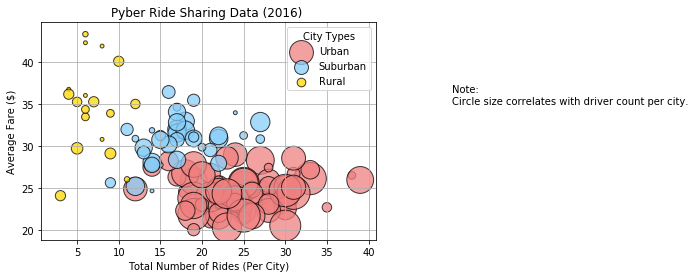

In [46]:
# Create groupby object for type
df_groupby = df.groupby(["type", "city"])  

# Create a new dataframe
df_by_type = pd.DataFrame()

# Calculations
df_by_type["total_rides"] = df_groupby["ride_id"].count()
df_by_type["average_fare"] = df_groupby["fare"].mean()
df_by_type["driver_count"] = df_groupby["driver_count"].mean()

# Get seperate dataframes for each type
df_rural = df_by_type.loc["Rural"]
df_suburb = df_by_type.loc["Suburban"]
df_urban = df_by_type.loc["Urban"]

# Build the scatter plots for each city types
plt_urban = plt.scatter(x = df_urban["total_rides"], y = df_urban["average_fare"], s = df_urban["driver_count"]*15, 
                        marker = 'o', alpha = 0.75, edgecolor = 'k', facecolor = 'lightcoral')
plt_suburb = plt.scatter(x = df_suburb["total_rides"], y = df_suburb["average_fare"], s = df_suburb["driver_count"]*15, 
                        marker = 'o', alpha = 0.75, edgecolor = 'k', facecolor = 'lightskyblue')
plt_rural = plt.scatter(x = df_rural["total_rides"], y = df_rural["average_fare"], s = df_rural["driver_count"]*15, 
                        marker = 'o', alpha = 0.75, edgecolor = 'k', facecolor = 'gold')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title("Pyber Ride Sharing Data (2016) ")

# Create a legend
plt.legend([plt_urban, plt_suburb, plt_rural], ["Urban", "Suburban", "Rural"], title = "City Types")

# Incorporate a text label regarding circle size
plt.text(50, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("pyber_ride_sharing_data.png")

## Total Fares by City Type

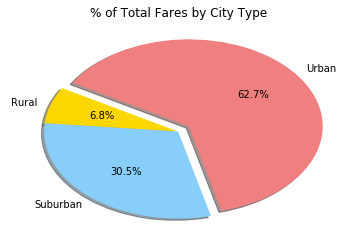

In [47]:
# Calculate Type Percents
df_type_groupby = df.groupby(["type"])
df_total_fares_type = df_type_groupby["fare"].sum().reset_index(level='type')

# Build Pie Chart
plt.pie(df_total_fares_type["fare"], labels=df_fares_type["type"], autopct="%1.1f%%", shadow=True, startangle=150, 
        explode=[0.0, 0.0, 0.1], colors = ["gold", "lightskyblue", "lightcoral"])
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("total_fares_by_city_type.png")

In [48]:
# Show Figure
plt.show()

## Total Rides by City Type

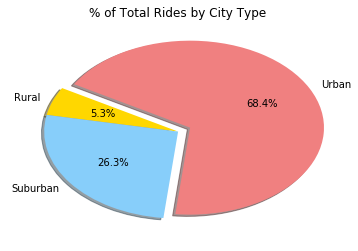

In [49]:
# Calculate Ride Percents
df_rides_type = df_type_groupby.count().reset_index(level='type')

# Build Pie Chart
plt.pie(df_rides_type["ride_id"], labels=df_fares_type["type"], autopct="%1.1f%%", shadow=True, startangle=150, 
        explode=[0.0, 0.0, 0.1], colors = ["gold", "lightskyblue", "lightcoral"])
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("total_rides_by_city_type.png")

In [50]:
# Show Figure
plt.show()

## Total Drivers by City Type

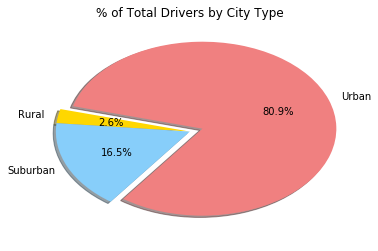

In [51]:
# Calculate Driver Percents
df_drivers_groupby = df_city.groupby(["type"])
df_drivers_type = df_drivers_groupby.sum().reset_index(level='type')

# Build Pie Chart
plt.pie(df_drivers_type["driver_count"], labels=df_fares_type["type"], autopct="%1.1f%%", shadow=True, startangle=165, 
        explode=[0.0, 0.0, 0.1], colors = ["gold", "lightskyblue", "lightcoral"])
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("total_drivers_by_city_type.png")

In [52]:
# Show Figure
plt.show()

In [53]:
# 